In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

In [30]:
df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/syndata/syndata.csv')
df = df[:50000]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [31]:
X = df
y = X['isFraud']
X = X.drop(['nameOrig', 'nameDest','isFlaggedFraud'], axis = 1)
X = pd.get_dummies(X,prefix=['type'])
X = X.drop(['isFraud'], axis = 1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [32]:
clf = IsolationForest(n_estimators=100, max_samples=200)

In [33]:
clf.fit(X)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=200, n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [34]:
scores_pred = clf.decision_function(X)

In [35]:
print(len(scores_pred))
print(len(df))

50000
50000


In [36]:
df['scores']= scores_pred

In [45]:
df = df.rename(index=str, columns={'isFraud': 'Category'})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Category,isFlaggedFraud,scores
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.023949
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.057295
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-0.011471
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.006106
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.050767


In [73]:
tp = 0
fp = 0
th = 0.1

for n in range(len(df)):
    if (df['Category'][n] == 1 and df['scores'][n] >= th):
        tp = tp+1
        
    if (df['Category'][n] == 0 and df['scores'][n] >= th):
        fp = fp+1
    
        
np = len(df.loc[df['Category'] == 1])
nn = len(df.loc[df['Category'] == 0])
n = len(df)

print('True Positives ' + str(tp/np))
print('False Positives ' + str(fp/nn))

True Positives 0.07
False Positives 0.47298597194388775


In [61]:
len(df.loc[df['Category'] == 1])

100

In [47]:
avg_count_0 = df.loc[df.Category==0]    #Data frame with normal observation
avg_count_1 = df.loc[df.Category==1] 

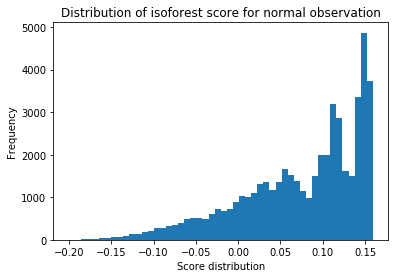

In [50]:
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
normal = plt.hist(avg_count_0.scores, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for normal observation")
plt.show()

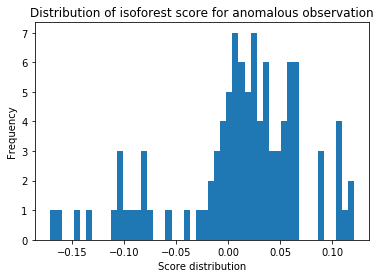

In [51]:
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
normal = plt.hist(avg_count_1.scores, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for anomalous observation")
plt.show()